In [1]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [2]:
data = pd.read_json("recipies.json")
data['ingredients_clean_string'] = [' , '.join(z).strip() for z in data['ingredients']] 
# further clean data and extract information through word lemmatization
data['ingredients_string'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) 
                                         for line in lists]).strip() for lists in data['ingredients']]
data['num_ingredients'] = [len(data.ingredients_string[ingredient].split(' ')) for ingredient in range(data.shape[0])]

In [3]:
data.head()

,cuisine,id,ingredients,ingredients_clean_string,ingredients_string,num_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce , black olives , grape tomatoe...",romaine lettuce black olives grape tomatoes ga...,16
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour , ground pepper , salt , tomatoes ...",plain flour ground pepper salt tomato ground b...,19
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs , pepper , salt , mayonaise , cooking oil...",egg pepper salt mayonaise cooking oil green ch...,20
3,indian,22213,"[water, vegetable oil, wheat, salt]","water , vegetable oil , wheat , salt",water vegetable oil wheat salt,5
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper , shallots , cornflour , cayenne ...",black pepper shallot cornflour cayenne pepper ...,33


In [4]:
allingredients = {}
cus =list(data.cuisine.value_counts().index)
for c in cus:
    allingredients[c] = None

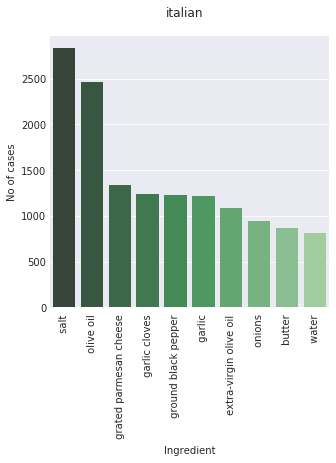

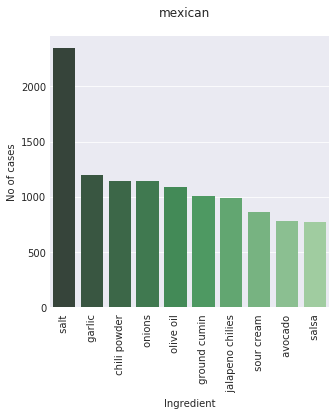

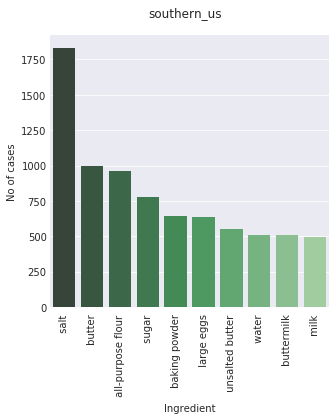

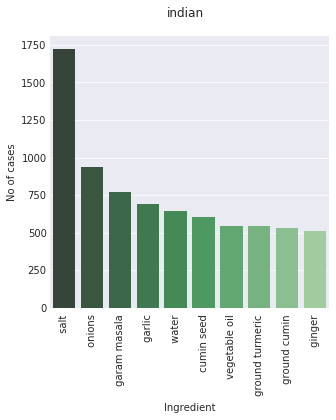

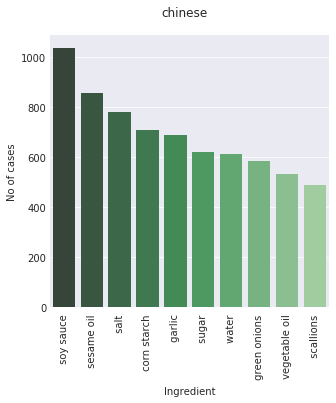

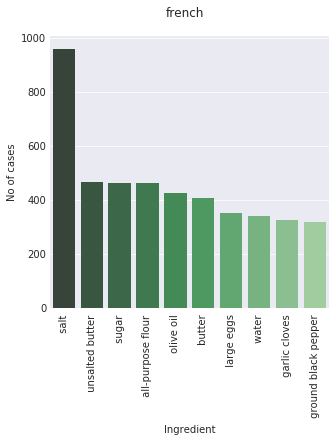

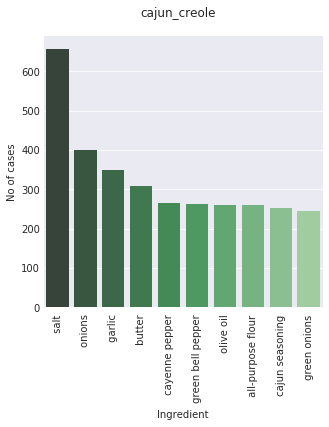

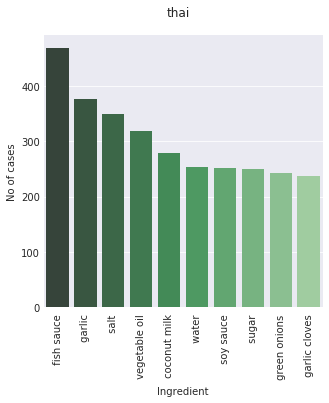

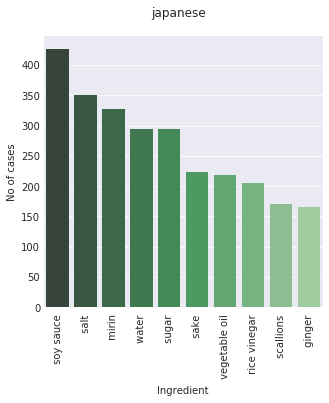

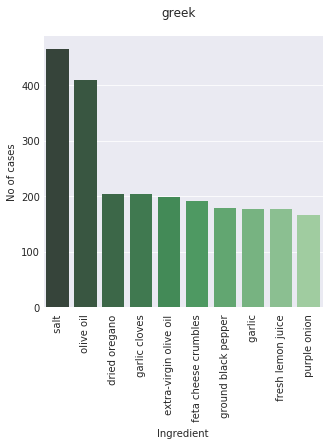

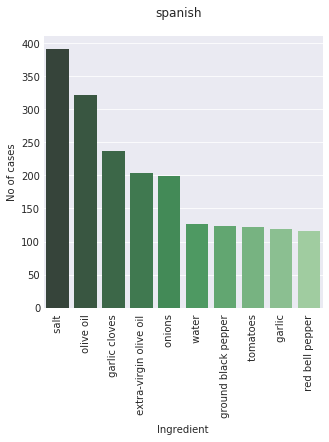

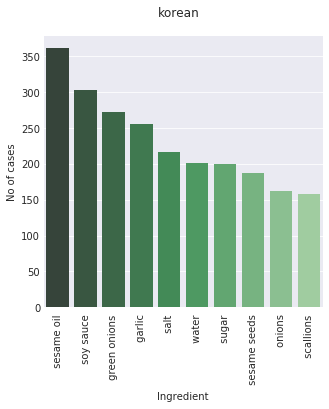

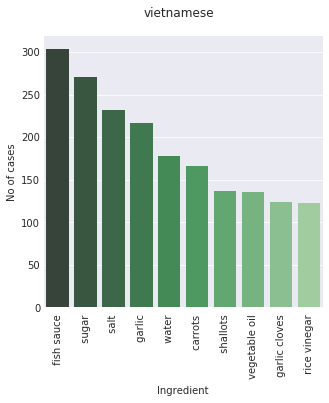

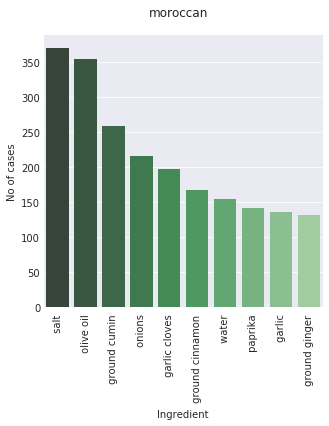

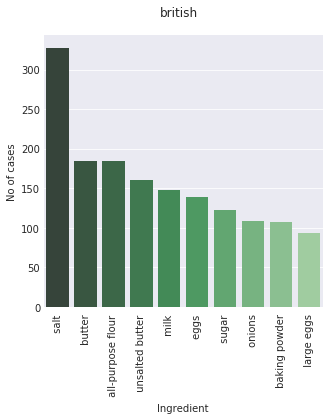

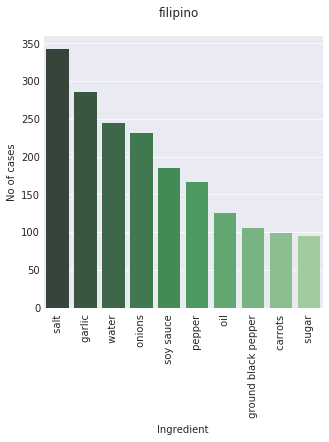

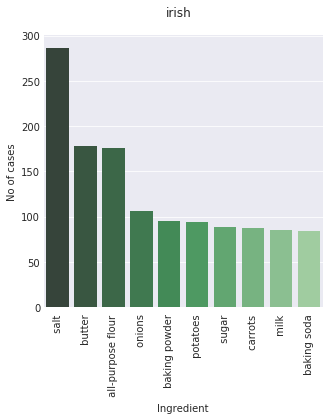

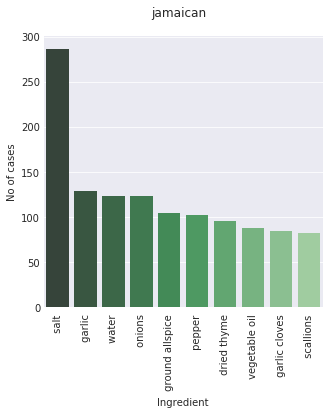

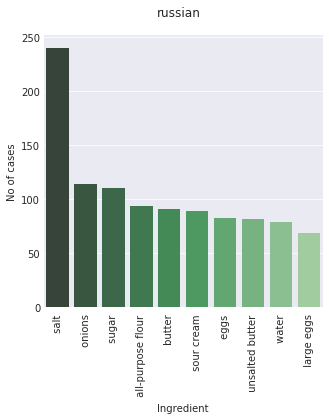

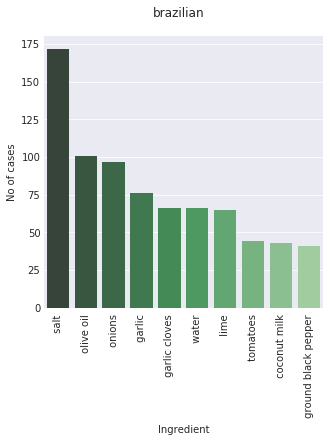

In [5]:
from itertools import chain
for c in cus:
    subset = data[data.cuisine == c]
    sub = []
    for item in subset.ingredients_clean_string:
        sub.append(item.split(','))
    A = pd.DataFrame(list(chain.from_iterable(sub)))
    
    # Top 10 ingredients by cuisine
    with sns.axes_style("darkgrid"):
        fig, ax = plt.subplots(figsize=(5, 5))
        plt.xticks(rotation='90')
        sns.countplot(x=0, data=A, order=A[0].value_counts().iloc[:10].index, palette="Greens_d")
        ax.set(xlabel="Ingredient", ylabel="No of cases")
        fig.suptitle(c, y=0.96)


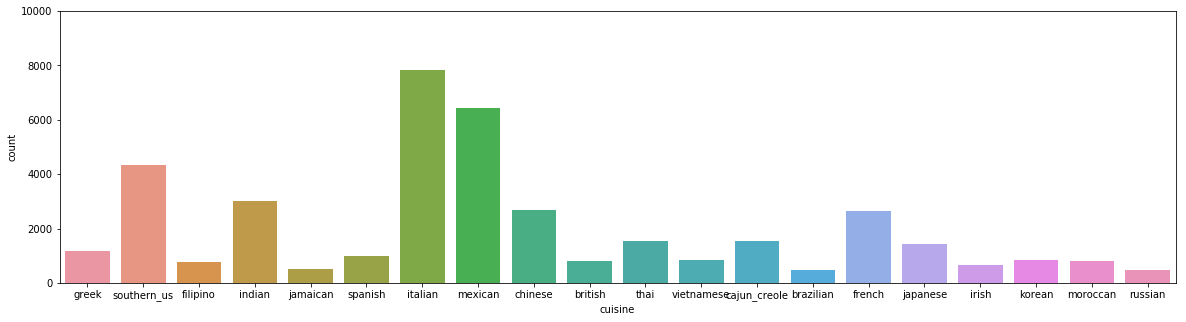

In [6]:
f, ax = plt.subplots(figsize=(20, 5))
fig=sns.countplot(x="cuisine",data=data)
fig.axis(ymin=0, ymax=10000);

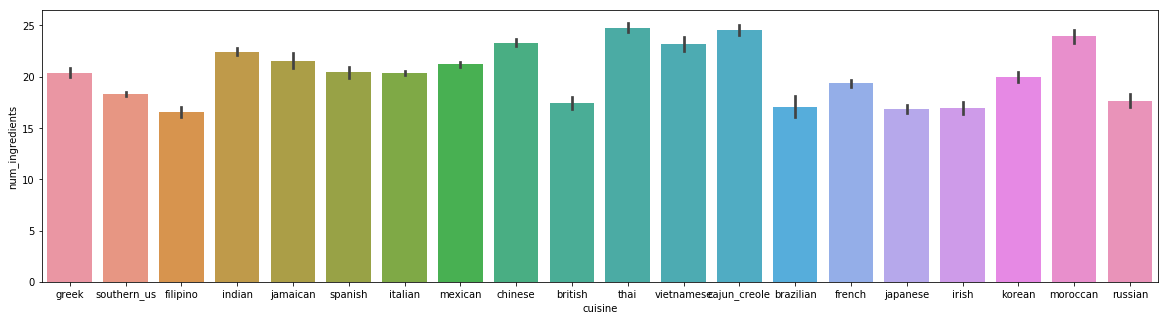

In [7]:
f, ax = plt.subplots(figsize=(20, 5))
fig=sns.barplot(x="cuisine", y="num_ingredients", data=data)

In [8]:
from collections import Counter
counters = {}
for cuisine in data['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (data['cuisine'] == cuisine)
    for ingredients in data[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [9]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


In [10]:
data['every_ingredients'] = data['ingredients'].map(";".join)
data.head()

,cuisine,id,ingredients,ingredients_clean_string,ingredients_string,num_ingredients,every_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce , black olives , grape tomatoe...",romaine lettuce black olives grape tomatoes ga...,16,romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour , ground pepper , salt , tomatoes ...",plain flour ground pepper salt tomato ground b...,19,plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs , pepper , salt , mayonaise , cooking oil...",egg pepper salt mayonaise cooking oil green ch...,20,eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]","water , vegetable oil , wheat , salt",water vegetable oil wheat salt,5,water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper , shallots , cornflour , cayenne ...",black pepper shallot cornflour cayenne pepper ...,33,black pepper;shallots;cornflour;cayenne pepper...


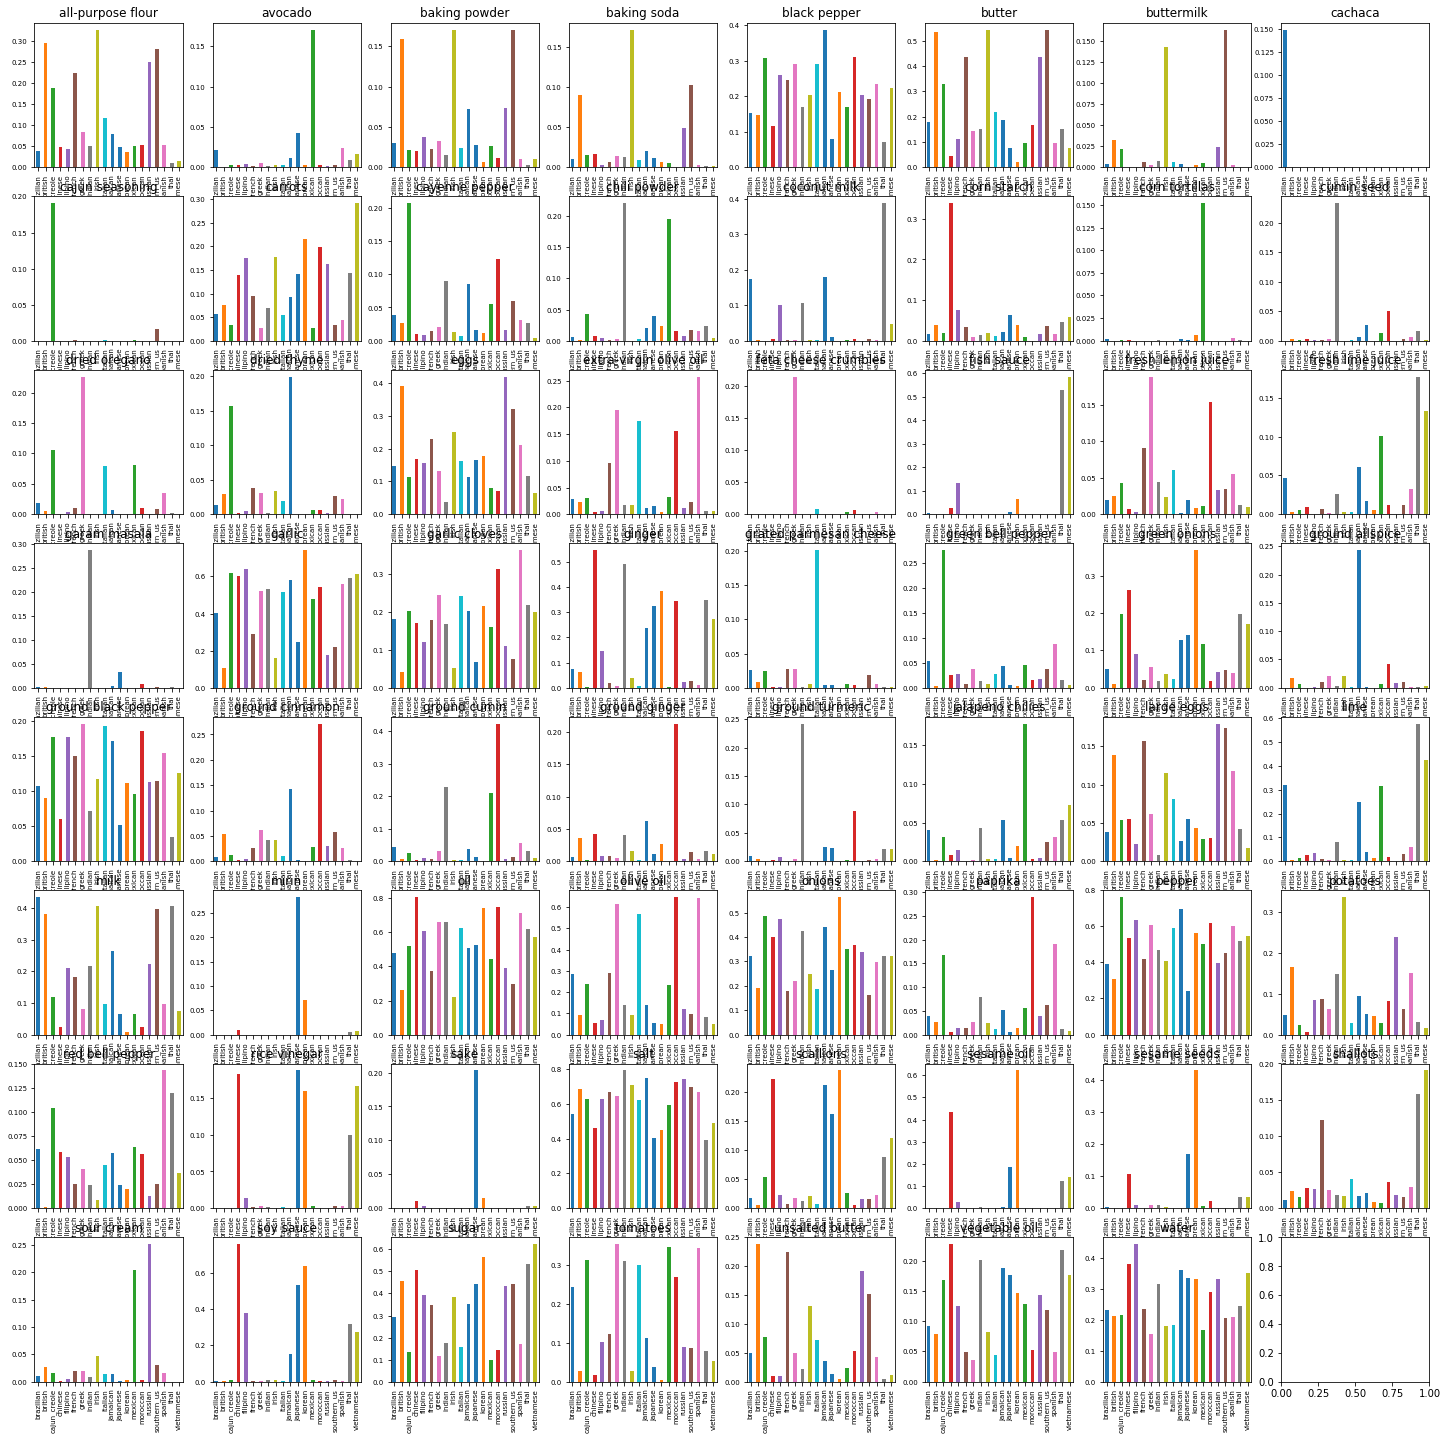

In [11]:
unique = np.unique(top10.values.ravel())
fig, axes = plt.subplots(8,8, figsize=(25, 25))
for ingredient, ax_index in zip(unique, range(64)):
    indices = data['every_ingredients'].str.contains(ingredient)
    relative_freq = (data[indices]['cuisine'].value_counts() / data['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

In [12]:
# Create empty list to store recipe features
features_all_list = []

# Extract the features from each recipe (need a global list)
for i in data.ingredients:
    features_all_list += i
    
# Remove duplicate features using default set behavior
features = list( set(features_all_list) )

len(features)

6714

In [13]:
onehot_ingredients = np.zeros((data.shape[0], len(features)))
# Index the features (ingredients) alphabetically
feature_lookup = sorted(features)

# For each recipe look up ingredient position in the sorted ingredient list
# If that ingredient exists, set the appropriate column equal to 1
## This will take 1-2 minutes to finish running
for index, row in data.iterrows():
    for ingredient in row['ingredients']:
        onehot_ingredients[index, feature_lookup.index(ingredient)] = 1



In [14]:
y = data.cuisine.values.reshape(-1,1)
# Create a dataframe
data_features = pd.DataFrame(onehot_ingredients)

# Create empty dictionary to store featureindex:columnname
d = {}

# For each feature, fetch the column name
for i in range(len(features)):
    d[data_features.columns[i]] = features[i]

# Rename the features (stop using the index # and use the actual text)
data_features = data_features.rename(columns=d)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, y, test_size=0.2, shuffle=True, random_state=42)

In [16]:
X_train.shape

(31819, 6714)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
logistic.score(X_test, y_test)

0.7825267127592709

Text(0.5,64.6,'Predicted label')

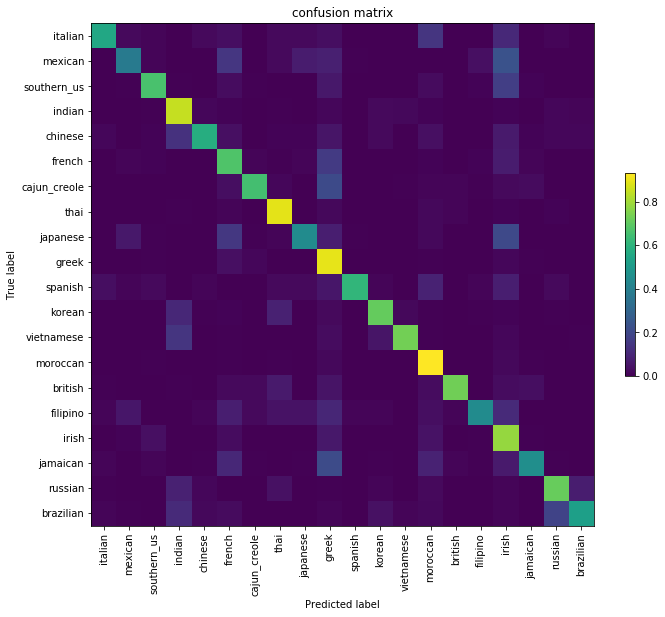

In [19]:
#Inspecting the classification results using a confusion matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = data['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [20]:
from sklearn.metrics import classification_report
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.73      0.56      0.64        84
     mexican       0.59      0.38      0.46       157
 southern_us       0.77      0.66      0.71       328
      indian       0.77      0.85      0.81       510
     chinese       0.73      0.58      0.65       136
      french       0.63      0.68      0.65       550
cajun_creole       0.77      0.65      0.71       249
        thai       0.86      0.90      0.88       602
    japanese       0.66      0.45      0.54       151
       greek       0.79      0.90      0.84      1567
     spanish       0.86      0.62      0.72        91
      korean       0.82      0.71      0.76       284
  vietnamese       0.85      0.73      0.79       166
    moroccan       0.90      0.93      0.91      1336
     british       0.88      0.73      0.80       166
    filipino       0.59      0.45      0.51        89
       irish       0.69      0.78      0.74       848
    jamaican       0.63    

In [26]:
 # Import random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier
 
# Set up random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=123)

# Train the random forest (use ravel to coerce to 1d array)
clf.fit(X_train, y_train.ravel())

# Get test predictions
clf.score(X_test, y_test)

0.7190446260213702

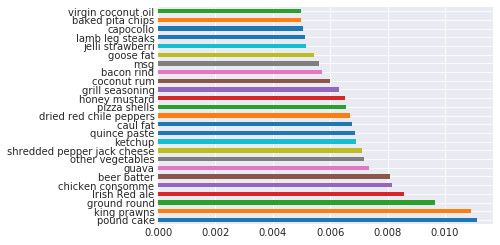

In [27]:
with sns.axes_style("darkgrid"):
    feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
    feat_importances.nlargest(25).plot(kind='barh')

In [28]:
# Take a look at the cuisine most associated with one of these important ingredients.
indices = data['every_ingredients'].str.contains('pound cake')
data[indices].groupby('cuisine').count().sort_values('ingredients', ascending=False)[:1]

,id,ingredients,ingredients_clean_string,ingredients_string,num_ingredients,every_ingredients
cuisine,,,,,,
italian,10,10,10,10,10,10


Italian is the most common cuisine in this corpus.

Text(0.5,64.6,'Predicted label')

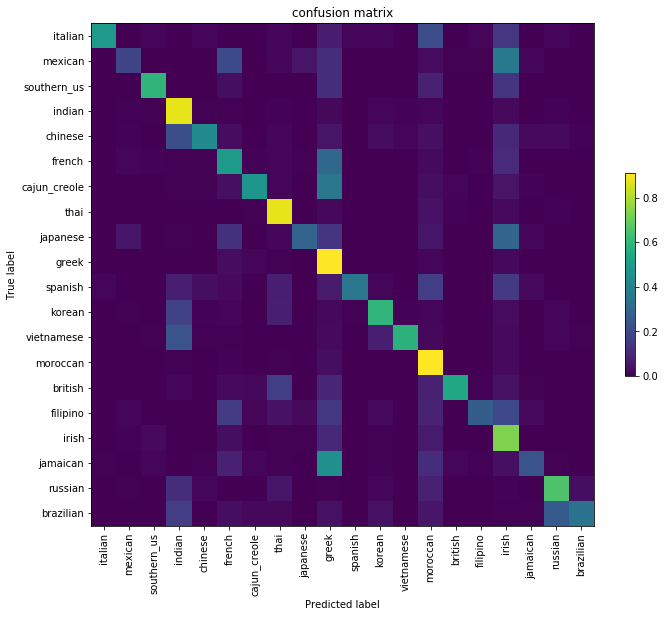

In [29]:
#Inspecting the classification results using a confusion matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, clf.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = data['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [30]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.85      0.49      0.62        84
     mexican       0.46      0.19      0.27       157
 southern_us       0.86      0.60      0.70       328
      indian       0.68      0.88      0.77       510
     chinese       0.71      0.44      0.55       136
      french       0.56      0.50      0.53       550
cajun_creole       0.73      0.48      0.58       249
        thai       0.81      0.88      0.84       602
    japanese       0.70      0.29      0.41       151
       greek       0.69      0.91      0.79      1567
     spanish       0.85      0.36      0.51        91
      korean       0.78      0.60      0.68       284
  vietnamese       0.89      0.58      0.71       166
    moroccan       0.80      0.91      0.85      1336
     british       0.85      0.54      0.66       166
    filipino       0.67      0.27      0.38        89
       irish       0.61      0.74      0.67       848
    jamaican       0.63    